# 1. Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from importlib import reload

In [2]:
# local modules
from rfq_data_loader import load_data
from preprocesser import preprocesser
from client import client_avg, client_detail, client_weighted_hist_pref
from unique_ISIN import unique_ISIN
from sim_matrix import sim_calculator, find_top_n_similar_bonds, is_newbond, isin_to_features, client_apetite, client_apetite_dict, bond_to_n_client
from new_bond import new_bond_df, new_bond_to_vec

# 2. Load and Preprocess Data

In [3]:
file_path = "RFQ_Data_Challenge_HEC.csv"
df = load_data(file_path)

/Users/danliliu/Documents/DSB_M2/natixis/recommender/rfq_data_loader.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [4]:
df.shape

(635455, 44)

In [5]:
df = preprocesser(df)
df.shape

/Users/danliliu/Documents/DSB_M2/natixis/recommender/preprocesser.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B_Price'] = pd.to_numeric(df['B_Price'], errors='coerce')  # Convert to float, invalid parsing will be set as NaN


(287174, 41)

# 3. Bond Recommender Core

In [6]:
# global
df_unique = unique_ISIN(df=df)
similarity_matrix, scaler, one_hot_encoder, features = sim_calculator(df_unique=df_unique)
isin_to_features_dict = isin_to_features(df_unique=df_unique, features=features)
client_apetite_dict_hist = client_apetite_dict(recent100=False,df=df, isin_to_features=isin_to_features_dict)
client_apetite_dict_recent = client_apetite_dict(recent100=True,df=df, isin_to_features=isin_to_features_dict)

/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in

/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in

/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in

/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():
/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in

In [7]:
# if there is an new bond, run this cell
new_bond = {
    'ISIN': 'new',
    'Coupon': 0.5,
    'BloomIndustrySubGroup': 'Sovereign',
    'Classification': 'Government',
    'Country': 'GERMANY',
    'Ccy': 'EUR',
    'Rating_SP': 'AAA',
    'Deal_Date': '2022-11-10',
    'Maturity': '2025-07-15',
    'Type': 'Fixed',
}
new_bond_df0 =new_bond_df(new_bond)
new_bond_features0 = new_bond_to_vec(new_bond_df=new_bond_df0,scaler=scaler, one_hot_encoder=one_hot_encoder)

In [8]:
# if there is a new bond, run this cell
client_hist_new_bond = bond_to_n_client(bond_vect=new_bond_features0,client_apetite_dict=client_apetite_dict_hist,n=10)
client_recent_new_bond = bond_to_n_client(bond_vect=new_bond_features0,client_apetite_dict=client_apetite_dict_recent,n=10)
bonds_new_bond = find_top_n_similar_bonds(new_bond_features=new_bond_features0, existing_features=features, df_unique=df_unique,n=10)

In [9]:
# if you want to recommend bond to certain client, run this cell
client = 'Societe Generale Mer'
client_hist_apetite = client_apetite(client=client, recent100=False, df=df, isin_to_features=isin_to_features_dict) # False to get historical apetite, True to get recent apetite
top_n_bonds=find_top_n_similar_bonds(new_bond_features=client_hist_apetite,existing_features=features, df_unique=df_unique, n=10)

/Users/danliliu/Documents/DSB_M2/natixis/recommender/sim_matrix.py:61: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for isin, weight in percentage.iteritems():


In [14]:
# if there is an existing bond, run this cell
isin = 'USY7S272AH57'
new_bond_features = isin_to_features_dict[isin].reshape(1,-1)
client_hist_new_bond = bond_to_n_client(bond_vect=new_bond_features,client_apetite_dict=client_apetite_dict_hist,n=10)
client_recent_new_bond = bond_to_n_client(bond_vect=new_bond_features,client_apetite_dict=client_apetite_dict_recent,n=10)
bonds_new_bond = find_top_n_similar_bonds(new_bond_features=new_bond_features,existing_features=features, df_unique=df_unique,n=10)

# 4. Bond Recommendation Basic Output

In [12]:
# if you want to compare with the queried new bond's info with the output, run this cell
new_bond_df0

,ISIN,Coupon,BloomIndustrySubGroup,Classification,Country,Ccy,Rating_SP,Maturity,dl_maturity_years,Type,Rating_SP_Ordinal
0,new,0.5,Sovereign,Government,GERMANY,EUR,AAA,2025-07-15,1.5,Fixed,21


In [15]:
# if you want to compare with the queried existing bond's info with the output, run this cell
df_unique.tail(2)

,ISIN,Coupon,BloomIndustrySubGroup,Classification,Country,Ccy,Rating_SP,Maturity,dl_maturity_years,Type,Rating_SP_Ordinal
634678,USY7S272AH57,5.875,Steel-Producers,Basic Materials,KOREA,USD,A-,2033-01-17,9.01,Fixed,15
635160,XS1218319702,1.000,REITS-Diversified,Financials,FRANCE,EUR,BBB+,2025-03-14,1.16,Fixed,14


In [16]:
client_hist_new_bond

["Banque Populaire De L'Ouest",
 'Ax',
 'Cegi Ett',
 'Bred',
 'Bnp Paribas',
 'Axa France Iard',
 'Sg',
 'Ce Loire Centre',
 'Oso',
 'Banque Cantonale Du Jura']

In [17]:
client_recent_new_bond

['Coface',
 'Cegc',
 'Qbe',
 'Socamet',
 'Societe Generale Artenay',
 'Bnp Reunion',
 'License De Transport',
 'Maitre Bondroit',
 'Hsbc',
 'Ce Loire Centre']

In [18]:
bonds_new_bond

,ISIN,Coupon,BloomIndustrySubGroup,Classification,Country,Ccy,Rating_SP,Maturity,dl_maturity_years,Type,Rating_SP_Ordinal
634678,USY7S272AH57,5.875,Steel-Producers,Basic Materials,KOREA,USD,A-,2033-01-17,9.01,Fixed,15
82240,USY7S272AG74,5.750,Steel-Producers,Basic Materials,KOREA,USD,A-,2028-01-17,4.01,Fixed,15
93684,USY7S272AF91,5.625,Steel-Producers,Basic Materials,KOREA,USD,A-,2026-01-17,2.01,Fixed,15
20999,USY7S272AD44,4.375,Steel-Producers,Basic Materials,KOREA,USD,A-,2025-08-04,1.55,Fixed,15
188733,USY8085FBL32,6.500,Electronic Compo-Semicon,Technology,KOREA,USD,BBB-,2033-01-17,9.01,Fixed,12
119810,XS2703610050,6.875,Finance-Invest Bnkr/Brkr,Financials,KOREA,USD,BBB,2026-11-06,2.81,Fixed,13
418736,USY8085FBK58,6.375,Electronic Compo-Semicon,Technology,KOREA,USD,BBB-,2028-01-17,4.01,Fixed,12
423625,US500630EB00,5.625,Special Purpose Banks,Government,KOREA,USD,AA,2033-10-23,9.78,Fixed,19
404642,US45604HAN70,5.375,Special Purpose Banks,Financials,KOREA,USD,AA-,2028-10-04,4.72,Fixed,18
97653,US302154DW60,5.125,Export/Import Bank,Government,KOREA,USD,AA,2033-01-11,9.00,Fixed,19


# 5. (Options) Filters for the basic output (TBD)

# 6. (Options) Explore the bond and the client (TBD)

In [14]:
# lib optional only for this notebook
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [15]:
cols = ['B_Side','Total_Requested_Volume','Total_Traded_Volume_Natixis','Total_Traded_Volume_Away','Total_Traded_Volume']

In [16]:
cols_name = ['Instrument','company_short_name','BloomIndustrySector','cdcissuer','Country']

In [17]:
df.B_Side.value_counts()

NATIXIS SELL    189790
NATIXIS BUY      97384
Name: B_Side, dtype: int64

In [ ]:
# General Distribution Among Total Traded Volume > 0
# 1. Country Distribution: France, Germany, Italy, ... Euro Zone
# 2. Currency Distribution
# 3. Industry Distribution
# 4. Sales Name # no, they are generalist
# 5. Coupon
# 6. Maturity
# 7. Company short name
# 8. Rating
# 9. Frequency

In [ ]:
# concern: One year data for short bond

In [ ]:
text = ' '.join(df['Country'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
# saving the image
word_cloud1.to_file('Country.png')

In [18]:
df['Ccy'].value_counts()

EUR    286291
USD       883
Name: Ccy, dtype: int64

In [19]:
df['Classification'].value_counts()

Government                     271564
Financials                      12812
Consumer Goods                    649
Industrials                       521
Utilities                         447
Telecommunications Services       322
Basic Materials                   259
Healthcare                        232
Consumer Services                 194
Energy                             86
Technology                         77
Mortgage Finance                   11
Name: Classification, dtype: int64

In [ ]:
text = ' '.join(df['BloomIndustrySubGroup'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
# saving the image
word_cloud1.to_file('got_BISG.png')

In [ ]:
text = ' '.join(df['cdcissuer'])
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
# saving the image
word_cloud1.to_file('got_cdci.png')

In [20]:
df['Coupon'].value_counts(bins=10)

(-0.011, 1.0]    116399
(2.0, 3.0]        51199
(1.0, 2.0]        45736
(3.0, 4.0]        41862
(4.0, 5.0]        25203
(5.0, 6.0]         5353
(6.0, 7.0]          838
(7.0, 8.0]          581
(9.0, 10.0]           2
(8.0, 9.0]            1
Name: Coupon, dtype: int64

In [21]:
# Count the values in each category
category_counts = df['dl_m_category'].value_counts()

print(category_counts)

short    122381
mid       85023
long      79770
Name: dl_m_category, dtype: int64


In [ ]:
# Combine all company names into a single string
# Replace spaces within company names with another character or sequence (e.g., underscore or another unique sequence)
text = ' '.join(df['company_short_name'].str.replace(' ', '_'))
word_cloud1 = WordCloud(collocations = True, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
# saving the image
word_cloud1.to_file('clients.png')

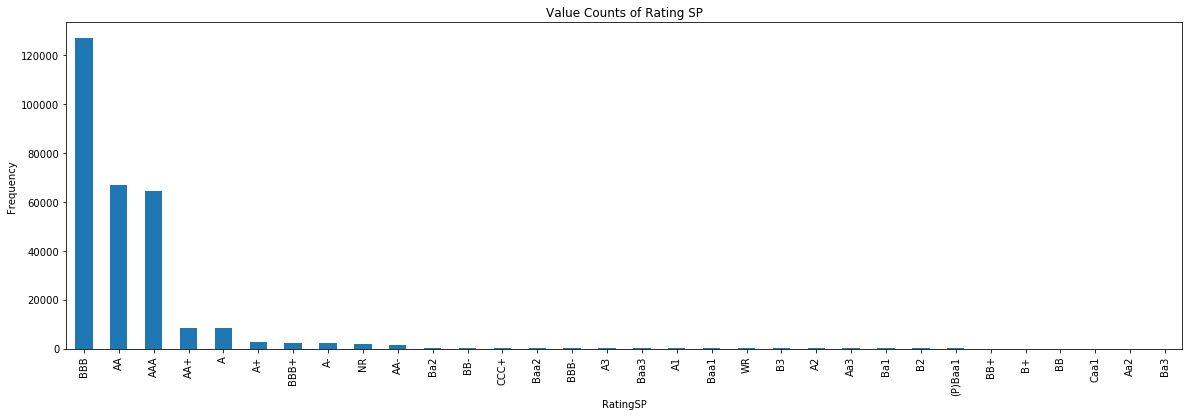

In [22]:
value_counts = df['Rating_SP'].value_counts()
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Rating SP')
plt.xlabel('RatingSP')
plt.ylabel('Frequency')
plt.savefig("RatingSP.png") 
plt.show()

In [23]:
df['Frequency'].value_counts() # we need to consider Frequency when comparing coupon rate

12M    175925
6M     111229
3M         20
Name: Frequency, dtype: int64

In [24]:
df['company_short_name'].value_counts(normalize=True)

Societe Generale Mer                          0.288027
Cegi Ett                                      0.130848
Credit Agricole Centre Loire Entreprises      0.069460
Hsbc                                          0.047793
Bnp Reunion                                   0.032694
                                                ...   
Mr Jean-Jacques Bondroit                      0.000352
Ce Idf                                        0.000296
Caisse D'Epargne D'Auvergne Et Du Limousin    0.000233
Crcam                                         0.000212
Bp2l                                          0.000146
Name: company_short_name, Length: 89, dtype: float64

In [25]:
df.Type.value_counts()

Fixed     284822
Stepup      2352
Name: Type, dtype: int64

In [ ]:
# Lets take a look the data at per client level
# 1. Average
# 2. for specific client
# We assume the key feature to differentiate a bond from others are: [Risk, Return]
# Let's see how diversified our client apetite is by count unique values

In [26]:
client_avg_diversity = client_avg(df)

In [27]:
client_avg_diversity['ISIN']

356.44

In [ ]:
client_name = 'Societe Generale Mer'
client_detail(client_name, df)['ISIN']

In [ ]:
client_name = 'Societe Generale Mer'
preference = 'dl_m_category'
weighted_sums = client_weighted_hist_pref(client_name, df, preference)

In [28]:
# by maturity
colors = ['whitesmoke', 'lightgrey', 'grey']

In [29]:
weighted_sums = df.groupby('dl_m_category')['Total_requested_Price*Amount'].sum()

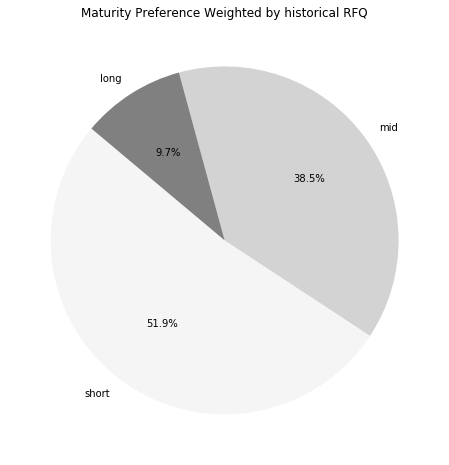

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(weighted_sums, labels=weighted_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Maturity Preference Weighted by historical RFQ')
plt.savefig('maturity_pre.png')
plt.show()

In [ ]:
client = 'Societe Generale Mer'
client_mask = df.company_short_name == client
client_df = df[client_mask]
weighted_sums = client_df.groupby('dl_m_category')['Total_requested_Price*Amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(weighted_sums, labels=weighted_sums.index, autopct='%1.1f%%', startangle=140,colors = colors)
plt.title(f'Maturity Preference of {client} Weighted by historical RFQ')
plt.show()

In [ ]:
type(weighted_sums)

In [ ]:
# global to keep: 
# tables of Client recent apetite, client historical apetite, ISINtofeatures, transformer(scaler and encoder),df,

In [ ]:
# from stock to client:
# default order by client pool [seperate by historical and recent apetite]
# from stock to stock:
# default order by stock distance
# feature: upload csv, query bond,
# display: display similar bond list and detail and liquidity(volume deal/days), 
# display potential client and their apetite(historical/recent preference for maturity, sector, Ratings,),
# display client pool(diversity, total value),
# display average as compare for all above
# page one: query and return list (click recent apetite tab)
# page two: click bond or client name in the list to see detail df in page two
# page three: click client name in the list to go client detail: diversity table, total value number, apetite 2*3 pie graph
# page three: average number for above in ()


In [ ]:
# query ISIN or detail

In [ ]:
# assumpation: CB recommendation
# preference weighted by value (price*amount)
# preference be averaged
# effective market where the b-price reflect the return+risk at the moment
# assumpation: rating is not changing

In [ ]:
# question: Define Bond Similarity by key characteristic done bond - client done

In [ ]:
# answer: sector, rating, amount, price, country, currency, maturity, coupon, frequency etc.

In [ ]:
# question: Identify investors behavior patterns so we can propose relevant trading opportunities

In [ ]:
# question: Categorize investors to enable anticipating potential interests based on the sub-category’s general behavior

In [ ]:
# provide an integration method to both technical and business process journeys (relying on the information provided during the sales conference